In [7]:
import numpy as np
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import os


from sklearn import preprocessing
#from sklearn import StandardScaler
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

In [4]:
from catboost import CatBoostRegressor

In [12]:
os.listdir()

['.ipynb_checkpoints',
 '472_77267_cf_01__66_66.ipynb',
 'approach.ipynb',
 'AV-LTFS-Data-Science-FinHack-ML-Hackathon-master.zip',
 'Bayes Inference.ipynb',
 'Club Mahindra',
 'Final_Submission.ipynb',
 'loan prediciton 3.ipynb',
 'loan prediction',
 'Logistic.ipynb',
 'LTFS Hackthon.ipynb',
 'NLP.ipynb',
 'Numpy and Pandas.ipynb',
 'Regularized_regression.py',
 'Tensorflow coursera.ipynb',
 'test.csv',
 'test.txt',
 'train.csv',
 'Udemy']

In [9]:
Data = pd.read_csv("train.csv")


In [10]:
Data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [19]:
Data.shape, Data.columns

((233154, 42),
 Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
        'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
        'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
        'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
        'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
        'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
        'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
        'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
        'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
        'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
        'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
        'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
        'loan_default', 'age'],
       dtype='object'))

# 1. Data preprocessing

In [14]:
#Data['Date'] = pd.to_datetime(Data['Date.of.Birth'],dayfirst=True)
# Calculating applicants age from Date of Birth
def calculateage(v):
    return pd.to_datetime('today').year - pd.to_datetime(v).year
    
Data['age'] = Data['Date.of.Birth'].apply(calculateage)


In [16]:
Data.age.head()

0    35
1    34
2    34
3    26
4    42
Name: age, dtype: int64

In [20]:
#Calculating total account age in months

Data['average.acct.age']=Data['AVERAGE.ACCT.AGE'].apply(lambda x: int(x.split(" ")[0][:-3])*12
                                                         +int(x.split(" ")[1][:-3]))


In [23]:
Data['average.acct.age'].head()

0     0
1    23
2     0
3     8
4     0
Name: average.acct.age, dtype: int64

In [24]:
#Calculating total crdit history age in months

Data['credit.history.length'] = Data['CREDIT.HISTORY.LENGTH'].apply(lambda x: int(x.split(" ")[0][:-3])*12 + 
                                                                    int(x.split(" ")[1][:-3]))

In [25]:
Data['credit.history.length'].head(n=10)

0     0
1    23
2     0
3    15
4     0
5    24
6     0
7     2
8    56
9    19
Name: credit.history.length, dtype: int64

In [26]:
#Calcculate time from the day of disbursal or how long ago the loan was disbursed

def calculatetime(v):
    return pd.to_datetime('26-04-2019') - pd.to_datetime(v)  

In [27]:
import time

start_time = time.time()



Data['Disbursal_time'] = Data['DisbursalDate'].apply(calculatetime)

print("Execution time: " + str((time.time() - start_time)) + ' ms')

Execution time: 373.0943055152893 ms


In [28]:
Data['Disbursal_time']= Data['Disbursal_time'].dt.days

In [29]:
Data.Disbursal_time.head()

0    414
1    212
2    473
3    182
4    212
Name: Disbursal_time, dtype: int64

In [30]:
#Filling Other in Employment type where NA present
Data['Employment.Type'].fillna('Other',inplace=True)

In [33]:
#Creating dummy columns for Score Description

Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace({'C-Very Low Risk':'Very Low Risk',
                                               'A-Very Low Risk':'Very Low Risk',
                                               'D-Very Low Risk':'Very Low Risk',
                                               'B-Very Low Risk':'Very Low Risk',
                                               'M-Very High Risk':'Very High Risk',
                                               'L-Very High Risk':'Very High Risk',
                                               'F-Low Risk':'Low Risk','E-Low Risk':'Low Risk',
                                               'H-Medium Risk':'Medium Risk','I-Medium Risk':'Medium Risk',
                                               'J-High Risk':'High Risk','K-High Risk':'High Risk',
                                               'No Bureau History Available':'No History',
                                               },inplace=True)

Data['Very_Low']=np.where(Data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Very Low'),1,0)
Data['Low']=np.where(Data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Low'),1,0)
Data['Medium']=np.where(Data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Medium'),1,0)
Data['High']=np.where(Data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('High'),1,0)
Data['Very_High']=np.where(Data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Very High'),1,0)
Data['Not_Scored']=np.where(Data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Not Scored'),1,0)
Data['No_History']=np.where(Data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('No Bureau'),1,0)


In [41]:
Data[['PERFORM_CNS.SCORE.DESCRIPTION']].head()

,PERFORM_CNS.SCORE.DESCRIPTION
0,No History
1,Medium Risk
2,No History
3,Very High Risk
4,No History


In [34]:
Data['ACTIVE.ACCTS']=Data['PRI.ACTIVE.ACCTS']+Data['SEC.ACTIVE.ACCTS']
Data['CURRENT.BALANCE']=Data['PRI.CURRENT.BALANCE']+Data['SEC.CURRENT.BALANCE']
Data['DISBURSED.AMOUNT']=Data['PRI.DISBURSED.AMOUNT']+Data['SEC.DISBURSED.AMOUNT']
Data['NO.OF.ACCTS']=Data['SEC.NO.OF.ACCTS']+Data['PRI.NO.OF.ACCTS']
Data['OVERDUE.ACCTS']=Data['PRI.OVERDUE.ACCTS']+Data['SEC.OVERDUE.ACCTS']
Data['SANCTIONED.AMOUNT']=Data['PRI.SANCTIONED.AMOUNT']+Data['SEC.SANCTIONED.AMOUNT']
Data['INSTAL.AMT']=Data['PRIMARY.INSTAL.AMT']+Data['SEC.INSTAL.AMT']


In [32]:
# for i in [ 'Aadhar_flag', 'Driving_flag', 'PAN_flag', 'Passport_flag', 'VoterID_flag']:
#     Data[i]=Data[i].astype(np.object)
Data['PERFORM_CNS.SCORE.BINS']=pd.cut(Data['PERFORM_CNS.SCORE'],5,
                                      labels=['Slim','Doubtful','Fair','Good','Great']).astype(np.object)

Data['ltv.BINS']=pd.cut(Data['ltv'],3,labels=['Low','Medium','High']).astype(np.object)



In [38]:
#Creating categoties for ltv and CNS score 

Data['ltv.BINS'].tail(), Data['PERFORM_CNS.SCORE.BINS'].head()

(233149    Medium
 233150      High
 233151    Medium
 233152    Medium
 233153      High
 Name: ltv.BINS, dtype: object, 0        Slim
 1        Good
 2        Slim
 3    Doubtful
 4        Slim
 Name: PERFORM_CNS.SCORE.BINS, dtype: object)

In [49]:

Data['Total_Flag']=Data['Driving_flag']+Data['Aadhar_flag']+Data['PAN_flag']+Data['Passport_flag']+Data['VoterID_flag']

In [47]:
Data['asset_value']=(Data['disbursed_amount']*100)/(Data['ltv'])
Data['value_cost']= Data['asset_cost']- Data['asset_value']


In [48]:
Data.asset_value.head(),Data.value_cost.head()

(0    56480.178671
 1    64379.352724
 2    59442.151065
 3    65001.130199
 4    59257.834597
 Name: asset_value, dtype: float64, 0    1919.821329
 1    1170.647276
 2    1917.848935
 3    1111.869801
 4    1042.165403
 Name: value_cost, dtype: float64)

In [52]:
Data['branch_id'] = Data['branch_id'].astype(np.object)
Data['manufacturer_id']= Data['manufacturer_id'].astype(np.object)
Data['supplier_id']= Data['supplier_id'].astype(np.object)

In [51]:
Data


,0,1,2,3,4,5,6,7,8,9,...,233144,233145,233146,233147,233148,233149,233150,233151,233152,233153
UniqueID,420825,537409,417566,624493,539055,518279,529269,510278,490213,510980,...,613161,606146,622612,645697,613494,626432,606141,613658,548084,630213
disbursed_amount,50578,47145,53278,57513,52378,54513,46349,43894,53713,52603,...,56059,49803,38439,72623,42894,63213,73651,33484,34259,75751
asset_cost,58400,65550,61360,66113,60300,61900,61500,61900,61973,61300,...,69001,66973,52965,105405,60334,105405,100600,71212,73286,116009
ltv,89.55,73.23,89.63,88.48,88.39,89.66,76.42,71.89,89.56,86.95,...,83.04,76.15,74.58,69.73,72.93,60.72,74.95,48.45,49.1,66.81
branch_id,67,67,67,67,67,67,67,67,67,67,...,34,34,34,34,34,34,34,77,77,77
supplier_id,22807,22807,22807,22807,22807,22807,22807,22807,22807,22807,...,23024,21081,20700,20700,20700,20700,23775,22186,22186,22186
manufacturer_id,45,45,45,45,45,45,45,45,45,45,...,86,45,48,48,48,48,51,86,86,86
Current_pincode_ID,1441,1502,1497,1501,1495,1501,1502,1501,1497,1492,...,1044,1051,1051,1051,1051,1050,990,2299,2299,2299
Date.of.Birth,01-01-84,31-07-85,24-08-85,30-12-93,09-12-77,08-09-90,01-06-88,04-10-89,15-11-91,01-06-68,...,15-06-63,23-12-85,23-07-82,19-06-89,08-07-93,01-08-88,05-12-88,01-06-76,26-03-94,18-02-84
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed,Self employed,Salaried,Salaried,Self employed,Salaried,...,Salaried,Self employed,Self employed,Salaried,Salaried,Salaried,Self employed,Salaried,Salaried,Salaried


In [55]:
Data_corr= Data[['UniqueID','disbursed_amount','asset_cost',
       'ltv', 'Employment.Type','State_ID',
       'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'age','ltv.BINS',
       'average.acct.age', 'credit.history.length',
       'Disbursal_time', 'ACTIVE.ACCTS', 'CURRENT.BALANCE',
       'DISBURSED.AMOUNT', 'NO.OF.ACCTS', 'OVERDUE.ACCTS', 'SANCTIONED.AMOUNT',
       'INSTAL.AMT', 'Total_Flag', 'asset_value', 'value_cost',
       'Very_Low','Low', 'Medium', 'High', 'Very_High', 'Not_Scored', 'No_History']]

In [54]:
Data_corr.T

,0,1,2,3,4,5,6,7,8,9,...,233144,233145,233146,233147,233148,233149,233150,233151,233152,233153
UniqueID,420825,537409,417566,624493,539055,518279,529269,510278,490213,510980,...,613161,606146,622612,645697,613494,626432,606141,613658,548084,630213
disbursed_amount,50578,47145,53278,57513,52378,54513,46349,43894,53713,52603,...,56059,49803,38439,72623,42894,63213,73651,33484,34259,75751
asset_cost,58400,65550,61360,66113,60300,61900,61500,61900,61973,61300,...,69001,66973,52965,105405,60334,105405,100600,71212,73286,116009
ltv,89.55,73.23,89.63,88.48,88.39,89.66,76.42,71.89,89.56,86.95,...,83.04,76.15,74.58,69.73,72.93,60.72,74.95,48.45,49.1,66.81
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed,Self employed,Salaried,Salaried,Self employed,Salaried,...,Salaried,Self employed,Self employed,Salaried,Salaried,Salaried,Self employed,Salaried,Salaried,Salaried
State_ID,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,4,4,4
PERFORM_CNS.SCORE,0,598,0,305,0,825,0,17,718,818,...,0,690,738,755,0,735,825,0,0,0
PRI.NO.OF.ACCTS,0,1,0,3,0,2,0,1,1,1,...,0,7,2,4,0,4,1,0,0,0
PRI.ACTIVE.ACCTS,0,1,0,0,0,0,0,1,1,0,...,0,4,2,4,0,3,0,0,0,0
PRI.OVERDUE.ACCTS,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#Categorical Data for Logistic Regression and other algorithms (XGB Random Forest) has been converted to dummy variables 
# for the training the model. Other Categorical data has been excluded whcih will be inculded in CatBoost Classifier.


Data_corr = pd.get_dummies(Data_corr.set_index('UniqueID'),columns=['Employment.Type',
                                                                   'State_ID','ltv.BINS'])

In [57]:
Data_corr.info()

#All the data is in int or float and can be used for model building now (LR XGB RF)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 61 columns):
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
PERFORM_CNS.SCORE                      233154 non-null int64
PRI.NO.OF.ACCTS                        233154 non-null int64
PRI.ACTIVE.ACCTS                       233154 non-null int64
PRI.OVERDUE.ACCTS                      233154 non-null int64
PRI.CURRENT.BALANCE                    233154 non-null int64
PRI.SANCTIONED.AMOUNT                  233154 non-null int64
PRI.DISBURSED.AMOUNT                   233154 non-null int64
NEW.ACCTS.IN.LAST.SIX.MONTHS           233154 non-null int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    233154 non-null int64
age                                    233154 non-null int64
average.acct.age                       233154 non-null int64
credit.history.length       

#  2. MODEL BUILDING 
    

In [58]:
Data_corr.shape

(233154, 61)

In [59]:
from xgboost import XGBClassifier 

ModuleNotFoundError: No module named 'xgboost'

In [63]:
#Data used for MODEL INPUT

X = Data_corr.copy()
Y = Data.loan_default

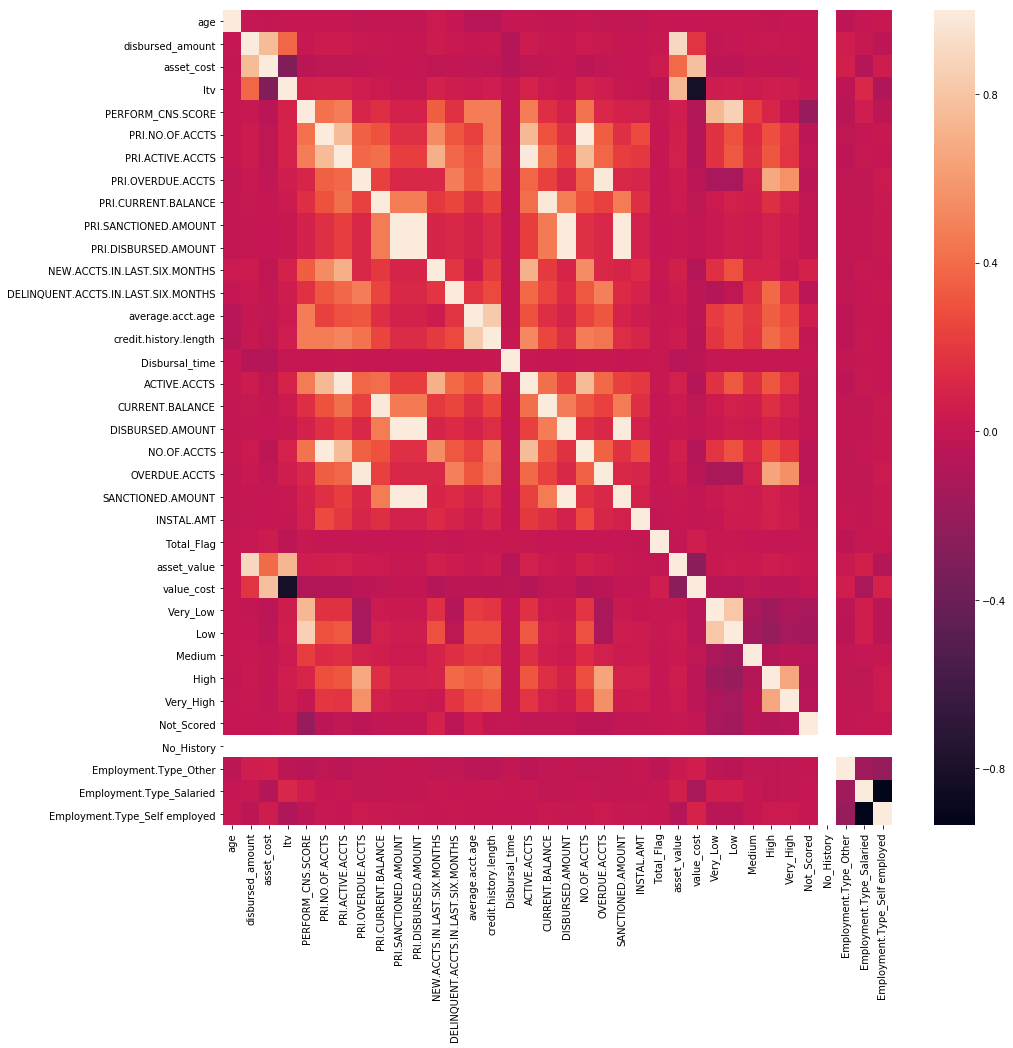

In [155]:
plt.figure(figsize = (15,15))
sns.heatmap(Data_corr.corr())

In [62]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, roc_curve


In [65]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=42)

### XGB 

In [ ]:
model = XGBClassifier()
model

In [ ]:
model.fit(X_train,y_train) 

In [ ]:
feature_importance = pd.DataFrame({'features': Data_corr.columns, 'feature_importance': model.feature_importances_})

In [ ]:
y_predict = model.predict(X_train) #Accuracy for training data

In [ ]:
accuracy_score(y_predict,y_train)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
accuracy_score(y_predict,y_test) #Accuracy on validation data

In [ ]:
feature_importance.sort_values(by = 'feature_importance', ascending = False)

In [ ]:
test = pd.read_csv("test.csv")
test.head() 
#Test data provided by LTFS

In [ ]:
test['Date'] = pd.to_datetime(test['Date.of.Birth'],dayfirst=True)
test['year'] = test['Date'].dt.strftime("%Y")
test['year'][test['year'] > date.today().strftime("%Y")] = (test['year'].astype(int) - 100).copy()
test['year'] = test['year'].astype(int)
test['age'] = (int(date.today().strftime("%Y"))- test['year'])


In [ ]:
test= test[['UniqueID', 'age', 'disbursed_amount', 'asset_cost',
       'ltv', 'Employment.Type', 'PAN_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']]
test = pd.get_dummies(test.set_index('UniqueID'))

In [ ]:
y_predicted = model.predict(test)

In [ ]:
#y_predicted = model.predict(y_testy_p
y_predicted.shape


In [ ]:
Result = pd.DataFrame({'UniqueID': test.index, 'loan_default': y_predicted})

In [ ]:
Result #Using XBBoost and normal dataset

In [ ]:
pd.DataFrame(y_predicted).to_csv("Results.csv")

In [ ]:
model.fit(X_train.smote,y_train.smote) 

In [ ]:
y_predict= model.predict(X_train.smote)

In [ ]:
accuracy_score(y_train.smote,y_predict)
#Result

In [ ]:
#roc_curve( y_test,y_predicted)

In [ ]:
np.unique(y_predicted)

In [ ]:
Result.head

In [ ]:
Result.to_csv("Result_ltfs.csv")

In [ ]:
Result.shape

In [ ]:
sample = pd.read_csv("sample.csv")

In [ ]:
sample.shape


In [ ]:
from imblearn.over_sampling import SMOTE

### Logistic Regression with feature scaling

In [ ]:
scaled = preprocessing.MinMaxScaler(Data_corr[['age', 'disbursed_amount', 'asset_cost', 'ltv', 'PAN_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'Employment.Type_Salaried', 'Employment.Type_Self employed']])

In [160]:
lr = LogisticRegression()

In [161]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [162]:
lr.fit(X_train,y_train)

C:\Users\e661293\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\e661293\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [163]:
y_pred = lr.predict(X_cv)

In [167]:
accuracy_score(y_pred,y_cv) #Accuracy on CV

0.7827926858907458

In [168]:
y_pred = lr.predict(X_train)

In [169]:
# Accuracy on train dataset
accuracy_score(y_train,y_pred)

0.7829749949450697

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits=3, random_state=7)

In [ ]:
y_pred_test = lr.predict(X_test)

In [ ]:
accuracy_score(y_pred_test,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)

In [ ]:
param_grid

In [ ]:
import time

lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

In [ ]:
time.time()

In [ ]:
#Testing on the given 'test' data set
y_predicted = lr.predict(test)

In [ ]:
Results = pd.DataFrame({'UniqueID': test.index, 'loan_default': y_predicted})

In [ ]:
Results

In [ ]:
Results.to_csv("Result_lr.csv")

In [ ]:
########
#Using SMOTE to balance the data set

y_train.value_counts()

In [ ]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [ ]:
np.bincount(y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

In [ ]:

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)



In [ ]:
y_pred=clf.predict(X_train)

In [ ]:
accuracy_score(y_pred,y_train)

In [ ]:
y_predicted = clf.predict(test)

In [ ]:
y_predicted

In [ ]:
Results = pd.DataFrame({'UniqueID': test.index, 'loan_default': y_predicted})

In [ ]:
Results

In [ ]:
Results.to_csv("Result_rf.csv")

In [ ]:
Data_sec = Data[['UniqueID', 'age', 'disbursed_amount', 'asset_cost',
       'ltv', 'Employment.Type', 'PAN_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS','MobileNo_Avl_Flag',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE']]

Data_sec = pd.get_dummies(Data_sec.set_index('UniqueID'))

In [ ]:
Data_sec.T

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(Data_sec.corr(),)

In [ ]:
X.sec = Data_sec.copy()
Y.sec = Data.loan_default

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X.sec, Y.sec, test_size=0.3, random_state=42)

In [ ]:
model = XGBClassifier()
model

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_predicted= model.predict(X_train)

In [ ]:
X_test.shape

In [ ]:
accuracy_score(y_predicted,y_train)

In [ ]:
test.shape

In [ ]:
test= pd.read_csv('test.csv')

test['Date'] = pd.to_datetime(test['Date.of.Birth'],dayfirst=True)
test['year'] = test['Date'].dt.strftime("%Y")
test['year'][test['year'] > date.today().strftime("%Y")] = (test['year'].astype(int) - 100).copy()
test['year'] = test['year'].astype(int)
test['age'] = (int(date.today().strftime("%Y"))- test['year'])


In [ ]:
test = test[['UniqueID', 'age', 'disbursed_amount', 'asset_cost',
       'ltv', 'Employment.Type', 'PAN_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS','MobileNo_Avl_Flag',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE']]

test = pd.get_dummies(test.set_index('UniqueID'))

In [ ]:
test.T

In [ ]:
y_pred = model.predict(test)

In [ ]:
y_pred

In [ ]:
Results = pd.DataFrame({'UniqueID': test.index, 'loan_default': y_pred})

In [ ]:
Results

In [ ]:
Results.to_csv("Result_xgb_sec.csv")

### Trying CatBoost algorithm

In [66]:
Data.T

,0,1,2,3,4,5,6,7,8,9,...,233144,233145,233146,233147,233148,233149,233150,233151,233152,233153
UniqueID,420825,537409,417566,624493,539055,518279,529269,510278,490213,510980,...,613161,606146,622612,645697,613494,626432,606141,613658,548084,630213
disbursed_amount,50578,47145,53278,57513,52378,54513,46349,43894,53713,52603,...,56059,49803,38439,72623,42894,63213,73651,33484,34259,75751
asset_cost,58400,65550,61360,66113,60300,61900,61500,61900,61973,61300,...,69001,66973,52965,105405,60334,105405,100600,71212,73286,116009
ltv,89.55,73.23,89.63,88.48,88.39,89.66,76.42,71.89,89.56,86.95,...,83.04,76.15,74.58,69.73,72.93,60.72,74.95,48.45,49.1,66.81
branch_id,67,67,67,67,67,67,67,67,67,67,...,34,34,34,34,34,34,34,77,77,77
supplier_id,22807,22807,22807,22807,22807,22807,22807,22807,22807,22807,...,23024,21081,20700,20700,20700,20700,23775,22186,22186,22186
manufacturer_id,45,45,45,45,45,45,45,45,45,45,...,86,45,48,48,48,48,51,86,86,86
Current_pincode_ID,1441,1502,1497,1501,1495,1501,1502,1501,1497,1492,...,1044,1051,1051,1051,1051,1050,990,2299,2299,2299
Date.of.Birth,01-01-84,31-07-85,24-08-85,30-12-93,09-12-77,08-09-90,01-06-88,04-10-89,15-11-91,01-06-68,...,15-06-63,23-12-85,23-07-82,19-06-89,08-07-93,01-08-88,05-12-88,01-06-76,26-03-94,18-02-84
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed,Self employed,Salaried,Salaried,Self employed,Salaried,...,Salaried,Self employed,Self employed,Salaried,Salaried,Salaried,Self employed,Salaried,Salaried,Salaried


In [ ]:
train = Data[['UniqueID','disbursed_amount','asset_cost',
       'ltv', 'Employment.Type','State_ID','branch_id',
       'supplier_id','manufacturer_id','Current_pincode_ID',
       'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'PERFORM_CNS.SCORE.DESCRIPTION',                                                                                                      
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'age','ltv.BINS','PERFORM_CNS.SCORE.BINS',
       'average.acct.age', 'credit.history.length',
       'Disbursal_time', 'ACTIVE.ACCTS', 'CURRENT.BALANCE',
       'DISBURSED.AMOUNT', 'NO.OF.ACCTS', 'OVERDUE.ACCTS', 'SANCTIONED.AMOUNT',
       'INSTAL.AMT', 'Total_Flag', 'asset_value', 'value_cost',
       'Very_Low','Low', 'Medium', 'High', 'Very_High', 'Not_Scored', 'No_History']]